<a href="https://colab.research.google.com/github/DenZhid/TelecommunicationSystemsLabs/blob/main/Lab8/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Зависимости**

In [5]:
import os
import scipy.signal
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from ipywidgets import interact, interactive, fixed
from thinkdsp import decorate
from thinkdsp import SquareSignal, Wave

# **Упражнение 8.1**

Блокнот для этой главы - *chap08.ipynb*. Прочитайте его и запустите код.

В нем есть интерактивный виджет, где можно экспериментировать с параметрами гауссова окна и изучить их влияние на частоту среза.

Что случится, если при увелечении ширины гауссова окна *std* не увеличивать число элементов в окне *м*?

**Ход работы:**

Имплементируем виджет из блокнота данной главы.

In [8]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

def plot_filter(M=11, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()

    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps    
    ratio[amps<560] = 0

    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    plt.plot(np.abs(dft_gaussian), color='gray', label='Гауссов фильтр')
    plt.plot(ratio, label='соотношение амплитуд')

    decorate(xlabel='Частота (Гц)', ylabel='Соотношение амплитуд')
    plt.show()

In [9]:
slider = widgets.IntSlider(min=2, max=100, value=11)
slider2 = widgets.FloatSlider(min=0, max=20, value=2)
interact(plot_filter, M=slider, std=slider2);

interactive(children=(IntSlider(value=11, description='M', min=2), FloatSlider(value=2.0, description='std', m…

# **Упражнение 8.2**

В этой главе утверждается, что преобразование Фурье гауссовой кривой - также гауссова кривая. Для дискретно преобразования Фурье это соотношение приблизительно верно.

Попробуйте его на нескольких примерах. Что происходит с преобразованием Фурье, если меняется *std*?

**Ход работы:**

Начнём с гауссиана, похожего на пример в книге.

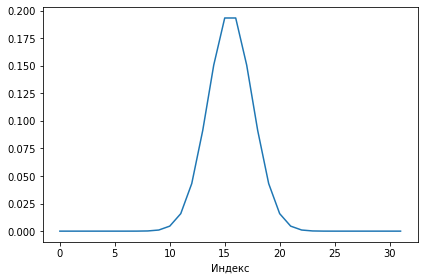

In [10]:
gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Индекс')

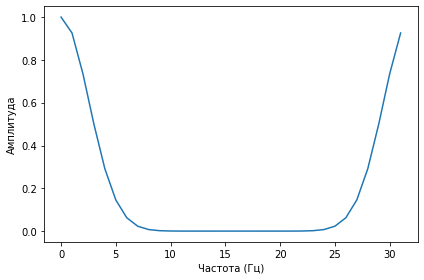

In [11]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

Напишем функцию, которая отображает Гауссово кривую и Быстрое преобразование Фурье рядом с ним.

In [14]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Время')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Частота')
    plt.show()

In [15]:
slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

По мере увеличения `std` Гауссиан становится шире, а ее БПФ — уже.

# **Упражнение 8.3**

В упражнениях к главе 3 изучалось влияние на утечки спектра окна Хэмминга и некоторых других, предоставляемых NumPy. Глубже понять эти окна можно, изучив их ДПФ.

В дополнение к Гауссову окну, использованному в этой главе, создаёте окно Хемминга тех же ращмеровю Дополните окно нулями и напечатайте его ДПФ. Какое окно больше подходит для фильтра НЧ? Полезно напечатать ДПФ с логарифмическим масштабом $y$.

Поэксперементируйте с разными окнами и разными размерами этих окон.

**Ход работы**

Создадим 1-секундную волну с частотой дискретизации 44,1 кГЦ.

In [16]:
signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

Создадим несколько окон, выбрав стандартное отклонение окна Гаусса так, чтобы сделать его похожим на другие (для удобства).

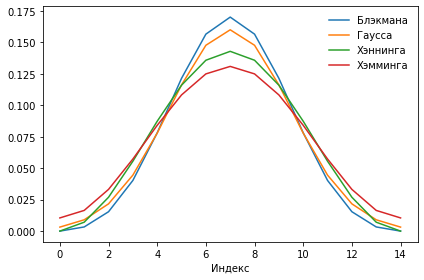

In [19]:
gaussian = scipy.signal.gaussian(M=15, std=2.5)   
bartlett = np.bartlett(15)
blackman = np.blackman(15)
hamming = np.hamming(15)
hanning = np.hanning(15)

windows = [blackman, gaussian, hanning, hamming]
names = ['Блэкмана', 'Гаусса', 'Хэннинга', 'Хэмминга']

for window in windows:
    window /= sum(window)

for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Индекс')

Выглядят похоже. Давайте теперь посмотрим на их функции ДПФ.

In [20]:
def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

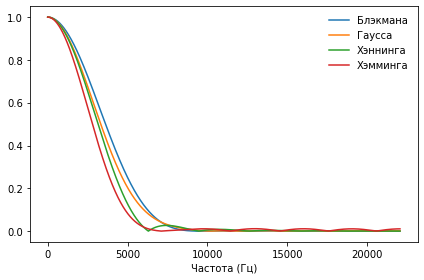

In [21]:
plot_window_dfts(windows, names)
decorate(xlabel='Частота (Гц)')

И их представление в логарифмическом масштабе.

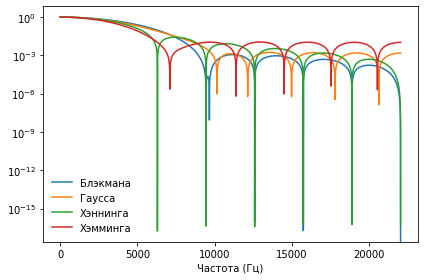

In [22]:
plot_window_dfts(windows, names)
decorate(xlabel='Частота (Гц)', yscale='log')